First few rows of the dataset:
  Province/State Country/Region       Lat       Long        Date  Confirmed  \
0            NaN    Afghanistan  33.93911  67.709953  2020-01-22          0   
1            NaN        Albania  41.15330  20.168300  2020-01-22          0   
2            NaN        Algeria  28.03390   1.659600  2020-01-22          0   
3            NaN        Andorra  42.50630   1.521800  2020-01-22          0   
4            NaN         Angola -11.20270  17.873900  2020-01-22          0   

   Deaths  Recovered  Active             WHO Region  
0       0          0       0  Eastern Mediterranean  
1       0          0       0                 Europe  
2       0          0       0                 Africa  
3       0          0       0                 Europe  
4       0          0       0                 Africa  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dt

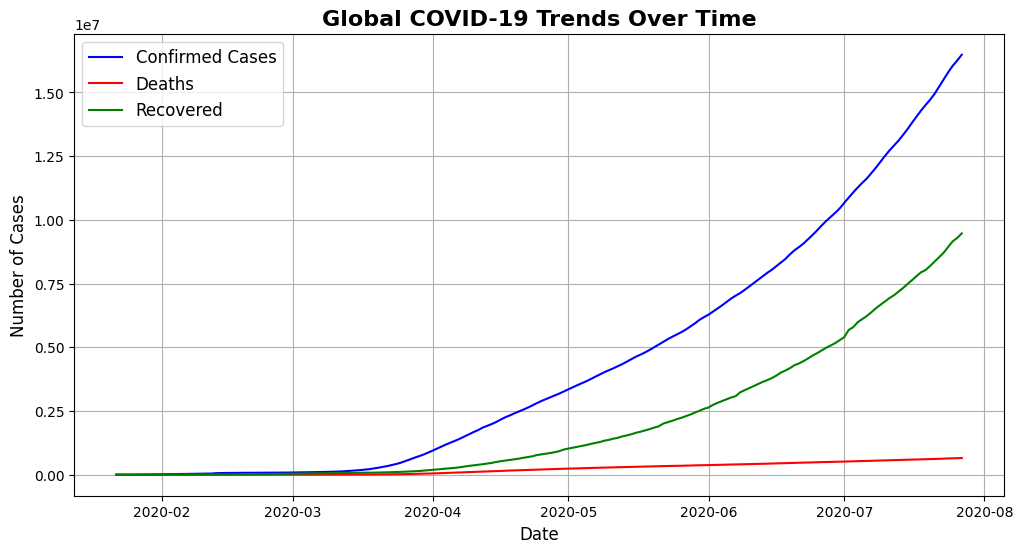

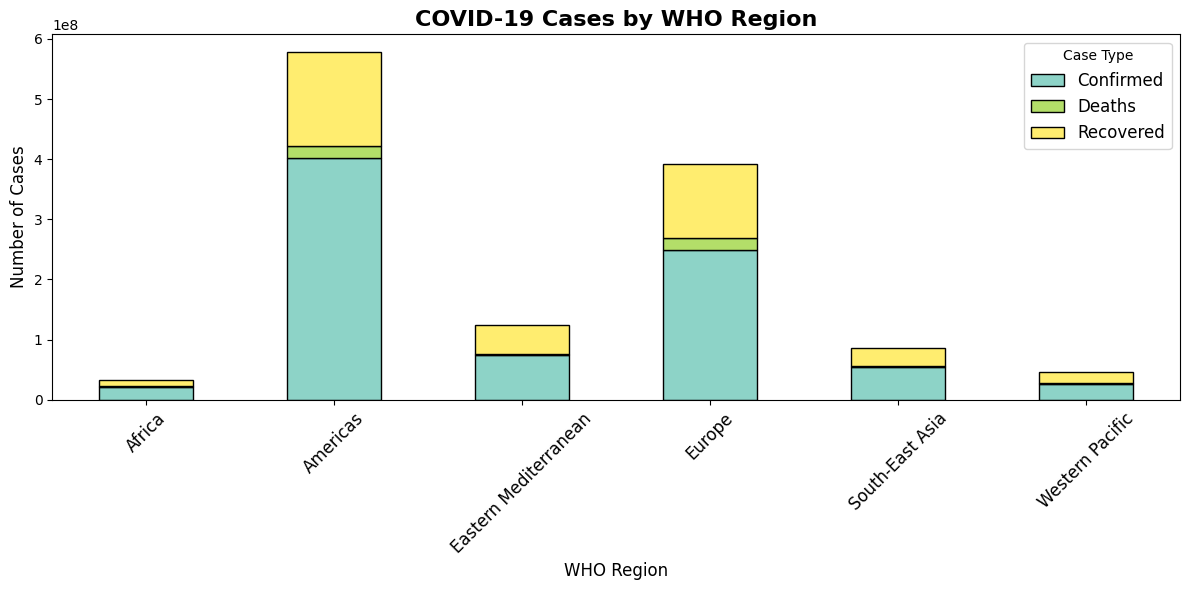

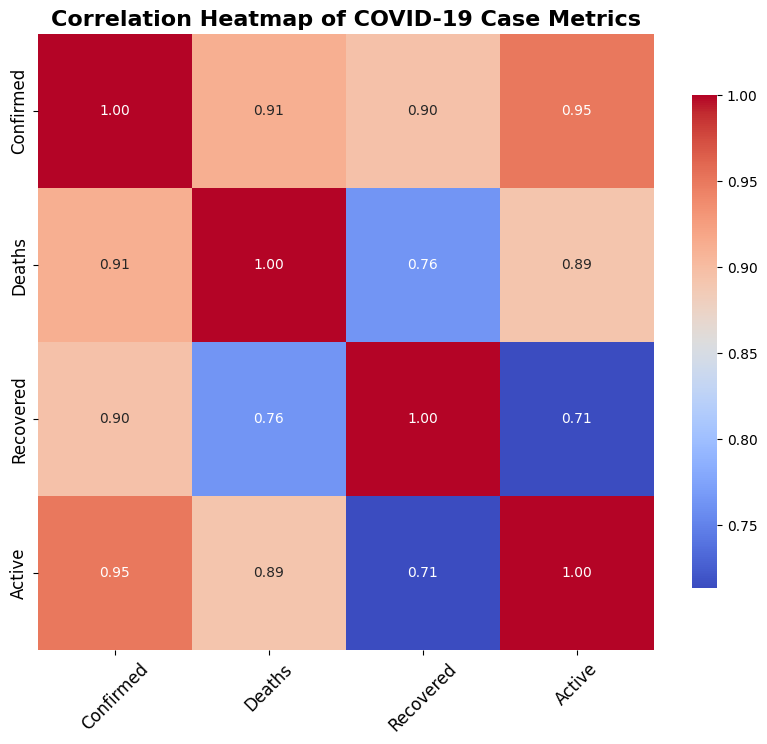

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_preview_data(file_path):
    """
    Loads the dataset from the given file path and previews its structure.

    Parameters:
        file_path (str): The path to the CSV file.

    Returns:
        pd.DataFrame: The loaded dataset.
    """
    df = pd.read_csv(file_path)
    print("First few rows of the dataset:")
    print(df.head())
    print("\nDataset Information:")
    print(df.info())
    print("\nMissing values in each column:")
    print(df.isnull().sum())
    return df


def clean_and_aggregate_data(df):
    """
    Cleans and aggregates the COVID-19 data by filling missing values and selecting necessary columns.

    Parameters:
        df (pd.DataFrame): The original dataset.

    Returns:
        pd.DataFrame: The cleaned and aggregated dataset.
    """
    # Fill missing Province/State with "Unknown"
    df['Province/State'] = df['Province/State'].fillna("Unknown")

    # Fill any missing numerical columns with 0
    df[['Confirmed', 'Deaths', 'Recovered', 'Active']] = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].fillna(0)

    # Save cleaned data
    df_cleaned = df[['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'WHO Region']]
    print("\nCleaned and aggregated data saved as 'cleaned_covid_data.csv'.")
    df_cleaned.to_csv("cleaned_covid_data.csv", index=False)

    return df_cleaned


def compute_statistical_analysis(df):
    """
    Computes summary statistics for the COVID-19 case metrics, including skewness and kurtosis.

    Parameters:
        df (pd.DataFrame): The aggregated dataset.

    Returns:
        pd.DataFrame: A summary table with descriptive statistics, skewness, and kurtosis.
    """
    # Select numerical columns for statistical analysis
    metrics = ['Confirmed', 'Deaths', 'Recovered', 'Active']

    # Compute descriptive statistics
    statistics = df[metrics].describe().T  # Transpose for better readability
    statistics['Median'] = df[metrics].median()  # Add median
    statistics['Skewness'] = df[metrics].skew()  # Add skewness
    statistics['Kurtosis'] = df[metrics].kurt()  # Add kurtosis

    # Save to CSV
    statistics.to_csv("statistical_summary.csv", index=True)
    print("\nStatistical summary table generated and saved as 'statistical_summary.csv'.")
    print(statistics)
    return statistics


def display_statistical_table(statistics):
    """
    Displays the statistical analysis table in a visually appealing format.

    Parameters:
        statistics (pd.DataFrame): The statistical summary table.
    """
    from tabulate import tabulate
    print("\nProfessional Statistical Summary Table:")
    print(tabulate(statistics, headers='keys', tablefmt='grid', showindex=True))


def plot_trend_over_time(df):
    """
    Plots the global trend of Confirmed, Deaths, and Recovered cases over time.

    Parameters:
        df (pd.DataFrame): The aggregated dataset.
    """
    # Aggregate data by date
    df_global = df.groupby('Date').sum()[['Confirmed', 'Deaths', 'Recovered']]

    # Convert Date to datetime
    df_global.index = pd.to_datetime(df_global.index)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(df_global.index, df_global['Confirmed'], label='Confirmed Cases', color='blue')
    plt.plot(df_global.index, df_global['Deaths'], label='Deaths', color='red')
    plt.plot(df_global.index, df_global['Recovered'], label='Recovered', color='green')
    plt.title('Global COVID-19 Trends Over Time', fontsize=16, weight='bold')
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Number of Cases', fontsize=12)
    plt.legend(fontsize=12)
    plt.grid(True)
    plt.show()


def plot_cases_by_region(df):
    """
    Plots the total number of cases by WHO Region.

    Parameters:
        df (pd.DataFrame): The aggregated dataset.
    """
    # Aggregate data by WHO Region
    region_data = df.groupby('WHO Region').sum()[['Confirmed', 'Deaths', 'Recovered', 'Active']]

    # Plot
    region_data[['Confirmed', 'Deaths', 'Recovered']].plot(
        kind='bar', figsize=(12, 6), stacked=True, colormap='Set3', edgecolor='black'
    )
    plt.title('COVID-19 Cases by WHO Region', fontsize=16, weight='bold')
    plt.xlabel('WHO Region', fontsize=12)
    plt.ylabel('Number of Cases', fontsize=12)
    plt.xticks(rotation=45, fontsize=12)
    plt.legend(title='Case Type', fontsize=12)
    plt.tight_layout()
    plt.show()


def plot_correlation_heatmap(df):
    """
    Plots a correlation heatmap for the COVID-19 case metrics.

    Parameters:
        df (pd.DataFrame): The aggregated dataset.
    """
    # Compute correlation matrix
    correlation_matrix = df[['Confirmed', 'Deaths', 'Recovered', 'Active']].corr()

    # Plot heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Heatmap of COVID-19 Case Metrics', fontsize=16, weight='bold')
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
    plt.show()


def main():
    """
    Main function to execute the COVID-19 data analysis workflow.
    """
    # Step 1: Load the dataset
    file_path = 'covid_19_clean_complete.csv'
    df = load_and_preview_data(file_path)

    # Step 2: Clean and aggregate the dataset
    df_cleaned = clean_and_aggregate_data(df)

    # Step 3: Compute statistical analysis
    statistics = compute_statistical_analysis(df_cleaned)

    # Step 4: Display the statistical table
    display_statistical_table(statistics)

    # Step 5: Plot trends over time
    plot_trend_over_time(df_cleaned)

    # Step 6: Plot cases by WHO Region
    plot_cases_by_region(df_cleaned)

    # Step 7: Plot correlation heatmap
    plot_correlation_heatmap(df_cleaned)


if __name__ == "__main__":
    main()
